# Stocks Data Modelling

## Packages and Presets

In [96]:
from tqdm.notebook import tqdm
from collections import deque, namedtuple, defaultdict
import pandas as pd
pd.set_option('display.max_rows' , 10)
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
import numpy as np
from plotnine import *
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta


%load_ext blackcellmagic

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


## Data Preprocessing and EDA

In [25]:
companies = pd.read_csv('big_tech_companies.csv')
prices = pd.read_csv('big_tech_stock_prices.csv')

In [26]:
print(companies.shape)
print(prices.shape)
print(companies.head())
print(prices.head())
print(companies.columns.tolist())
print(prices.columns.tolist())

(14, 2)
(45088, 8)
  stock_symbol              company
0         AAPL           Apple Inc.
1         ADBE           Adobe Inc.
2         AMZN     Amazon.com, Inc.
3          CRM     Salesforce, Inc.
4         CSCO  Cisco Systems, Inc.
  stock_symbol        date  open  high   low  close  adj_close     volume
0         AAPL  2010-01-04 7.622 7.661 7.585  7.643      6.515  493729600
1         AAPL  2010-01-05 7.664 7.700 7.616  7.656      6.526  601904800
2         AAPL  2010-01-06 7.656 7.687 7.527  7.535      6.423  552160000
3         AAPL  2010-01-07 7.562 7.571 7.466  7.521      6.411  477131200
4         AAPL  2010-01-08 7.511 7.571 7.466  7.571      6.453  447610800
['stock_symbol', 'company']
['stock_symbol', 'date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']


In [27]:
prices.describe()

,open,high,low,close,adj_close,volume
count,45088.000,45088.000,45088.000,45088.000,45088.000,45088.000
mean,89.267,90.370,88.112,89.271,85.210,52978130.538
std,101.627,103.001,100.124,101.593,100.996,93247295.873
min,1.076,1.109,0.999,1.053,1.053,589200.000
25%,25.670,25.930,25.360,25.660,22.076,9629425.000
50%,47.930,48.460,47.465,47.970,45.377,26463150.000
75%,128.663,129.849,127.254,128.641,113.672,58397675.000
max,696.280,700.990,686.090,691.690,691.690,1880998000.000


stock_symbol    0
date            0
open            0
high            0
low             0
close           0
adj_close       0
volume          0
dtype: int64


/home/janhsc/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/missingno/missingno.py:60: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
/home/janhsc/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
/home/janhsc/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.


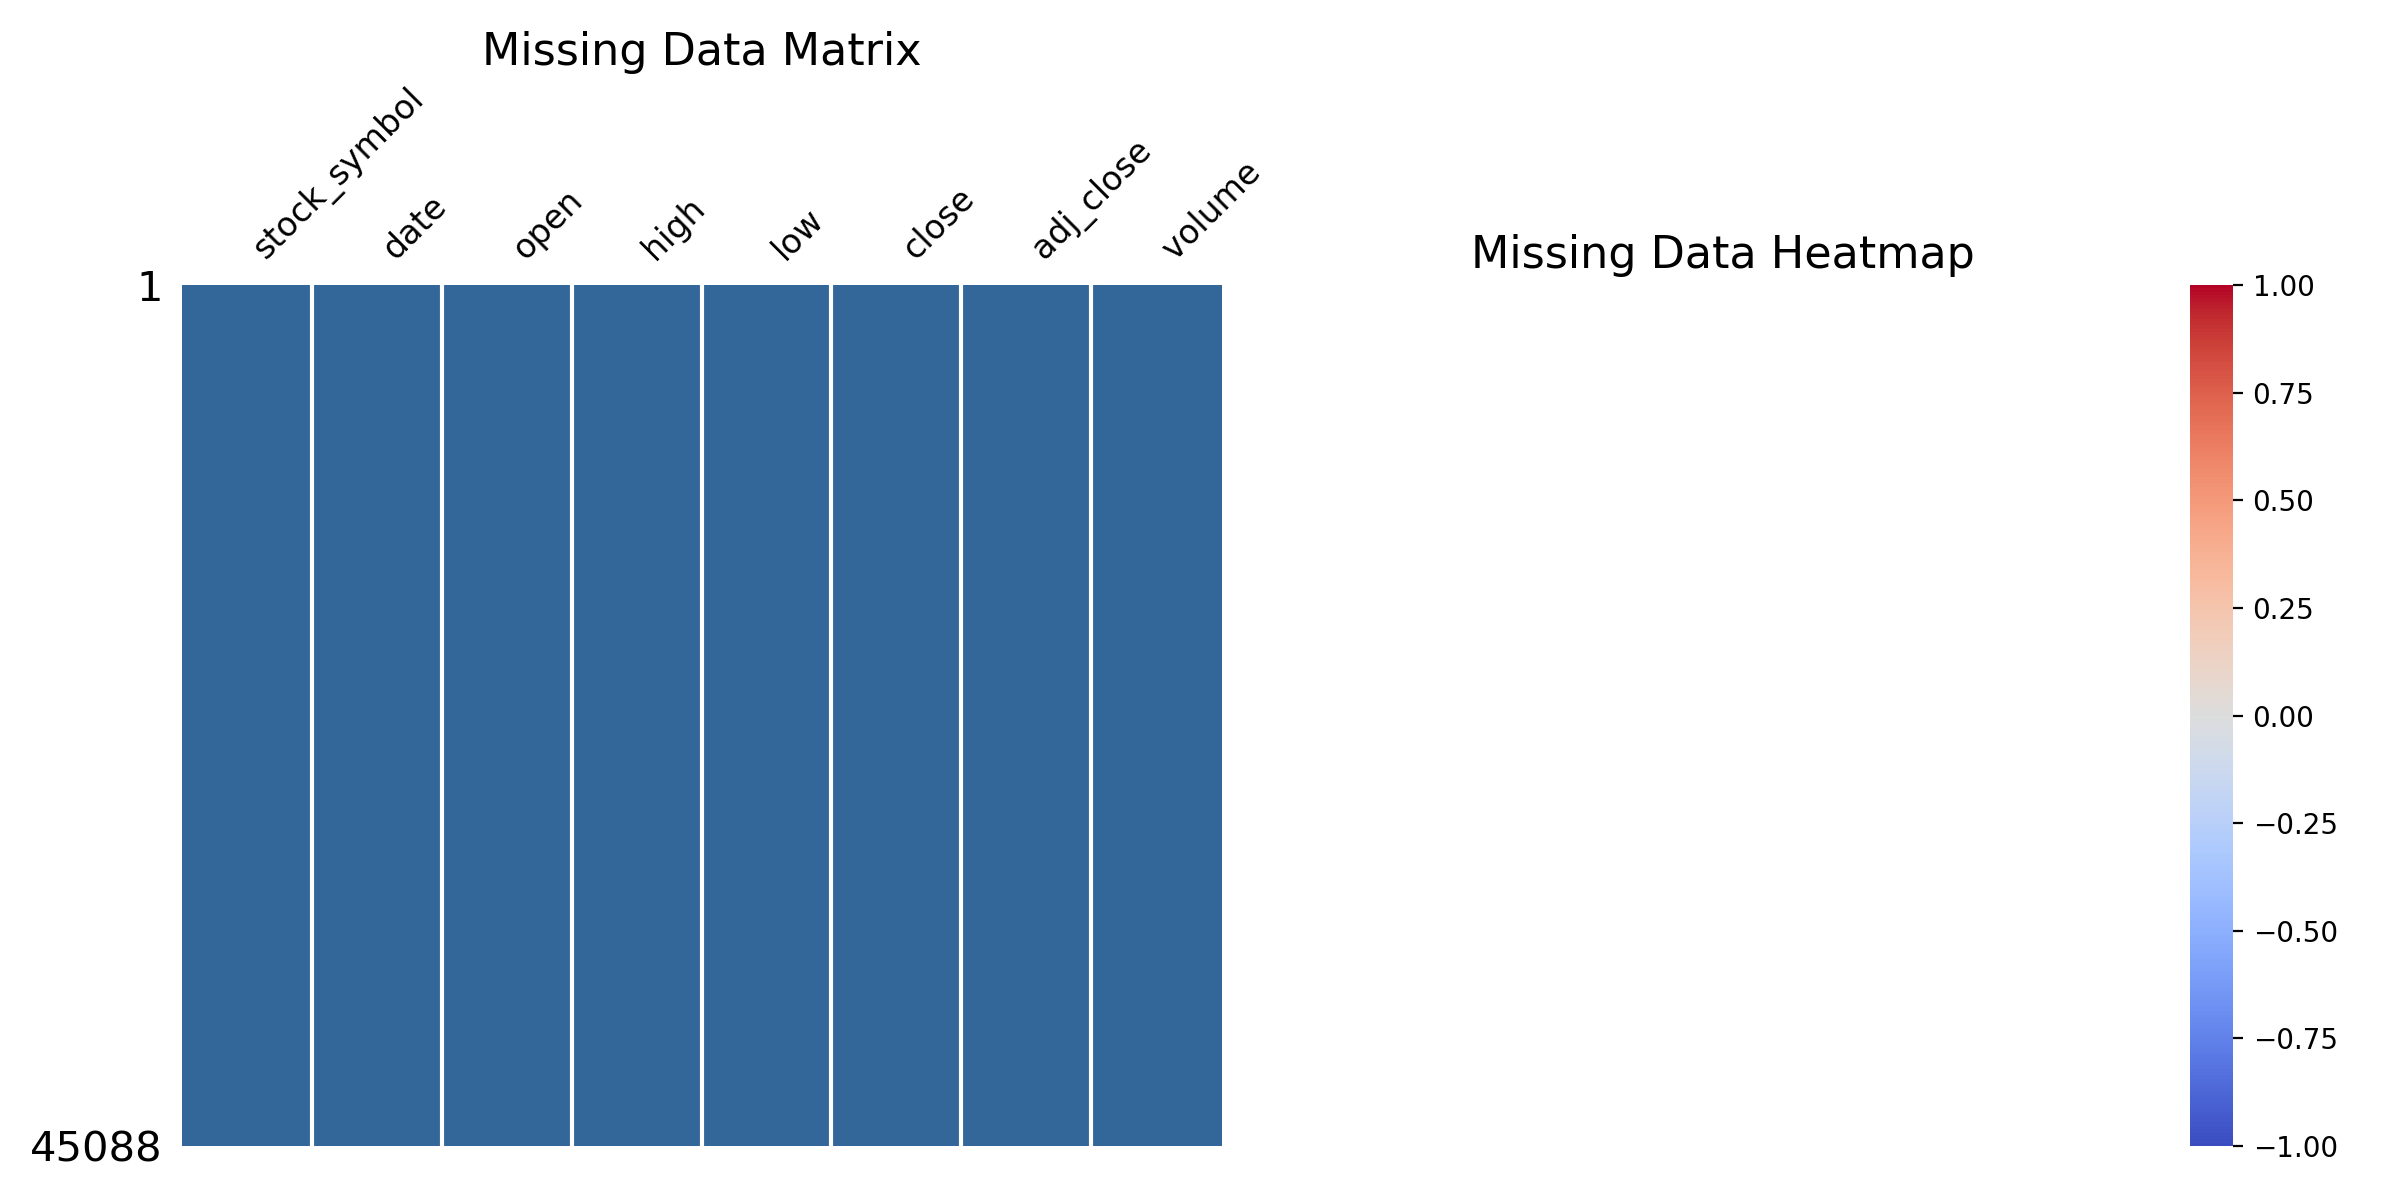

In [28]:
# Count number of missing values for each column
print(prices.isnull().sum())

# Create a figure and axes for customizing the plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Customize the matrix plot
msno.matrix(prices, ax=axes[0], sparkline=True, fontsize=12, color=(0.2, 0.4, 0.6))
axes[0].set_title('Missing Data Matrix', fontsize=16)

# Customize the heatmap plot
msno.heatmap(prices, ax=axes[1], cmap='coolwarm', fontsize=12)
axes[1].set_title('Missing Data Heatmap', fontsize=16)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

stock_symbol    0
company         0
dtype: int64


/home/janhsc/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/missingno/missingno.py:60: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
/home/janhsc/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
/home/janhsc/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.


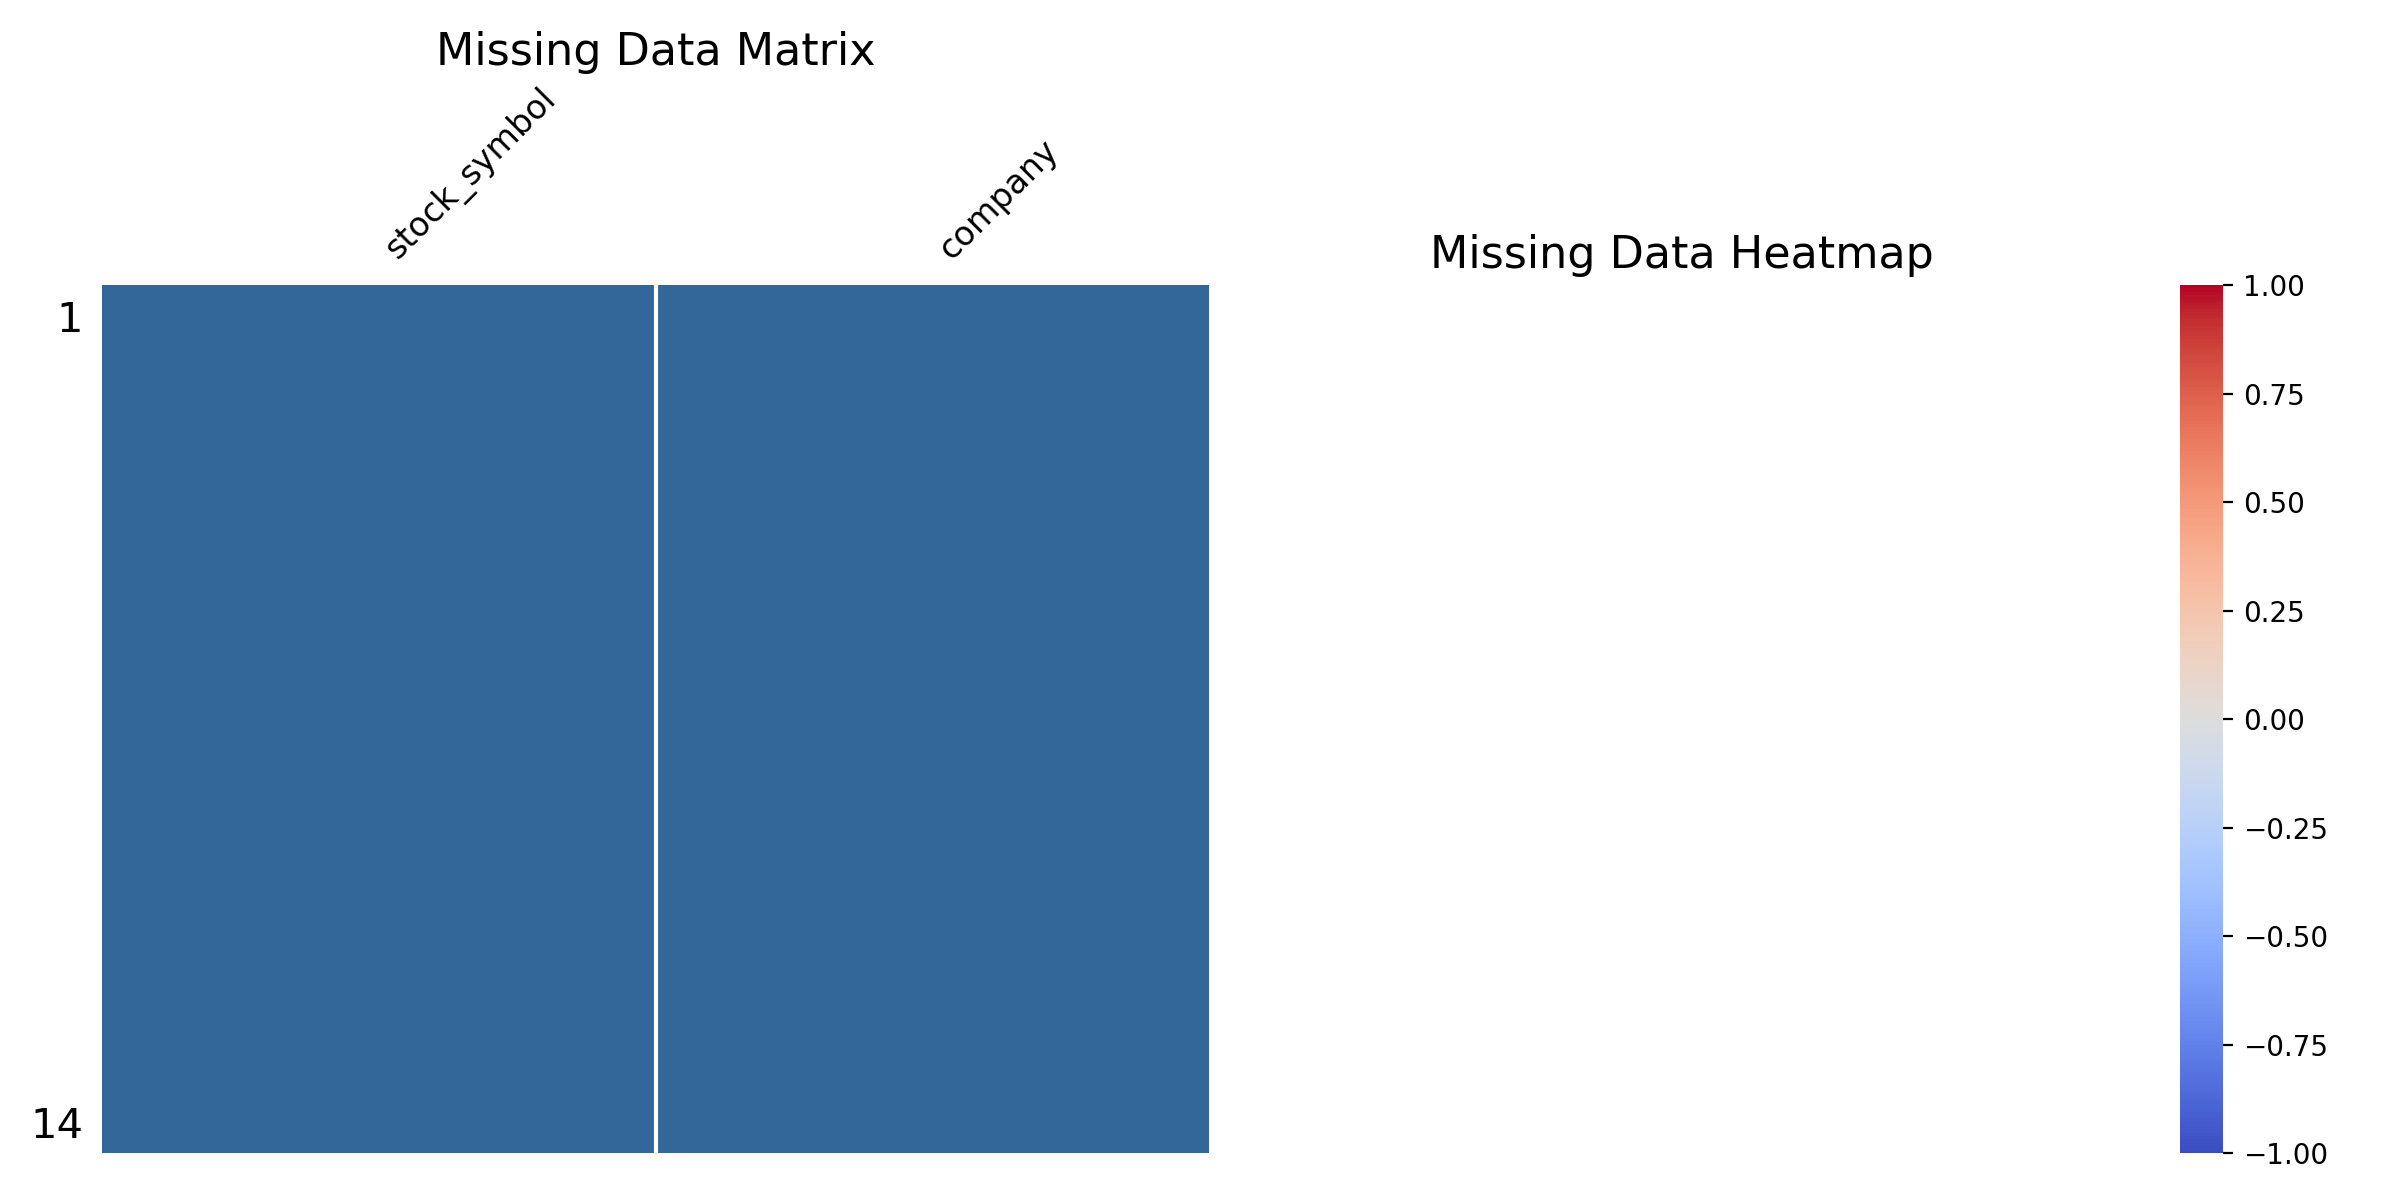

In [29]:
# Count number of missing values for each column
print(companies.isnull().sum())

# Create a figure and axes for customizing the plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Customize the matrix plot
msno.matrix(companies, ax=axes[0], sparkline=True, fontsize=12, color=(0.2, 0.4, 0.6))
axes[0].set_title('Missing Data Matrix', fontsize=16)

# Customize the heatmap plot
msno.heatmap(companies, ax=axes[1], cmap='coolwarm', fontsize=12)
axes[1].set_title('Missing Data Heatmap', fontsize=16)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [30]:
merged = pd.merge(prices, companies, on = 'stock_symbol', how = 'left')
merged.head()

,stock_symbol,date,open,high,low,close,adj_close,volume,company
0,AAPL,2010-01-04,7.622,7.661,7.585,7.643,6.515,493729600,Apple Inc.
1,AAPL,2010-01-05,7.664,7.700,7.616,7.656,6.526,601904800,Apple Inc.
2,AAPL,2010-01-06,7.656,7.687,7.527,7.535,6.423,552160000,Apple Inc.
3,AAPL,2010-01-07,7.562,7.571,7.466,7.521,6.411,477131200,Apple Inc.
4,AAPL,2010-01-08,7.511,7.571,7.466,7.571,6.453,447610800,Apple Inc.


In [31]:
merged[['stock_symbol', 'date']].nunique()

stock_symbol      14
date            3287
dtype: int64

In [32]:
merged['diff'] = merged['high'] - merged['low']
merged['date'] = pd.to_datetime(merged['date'])

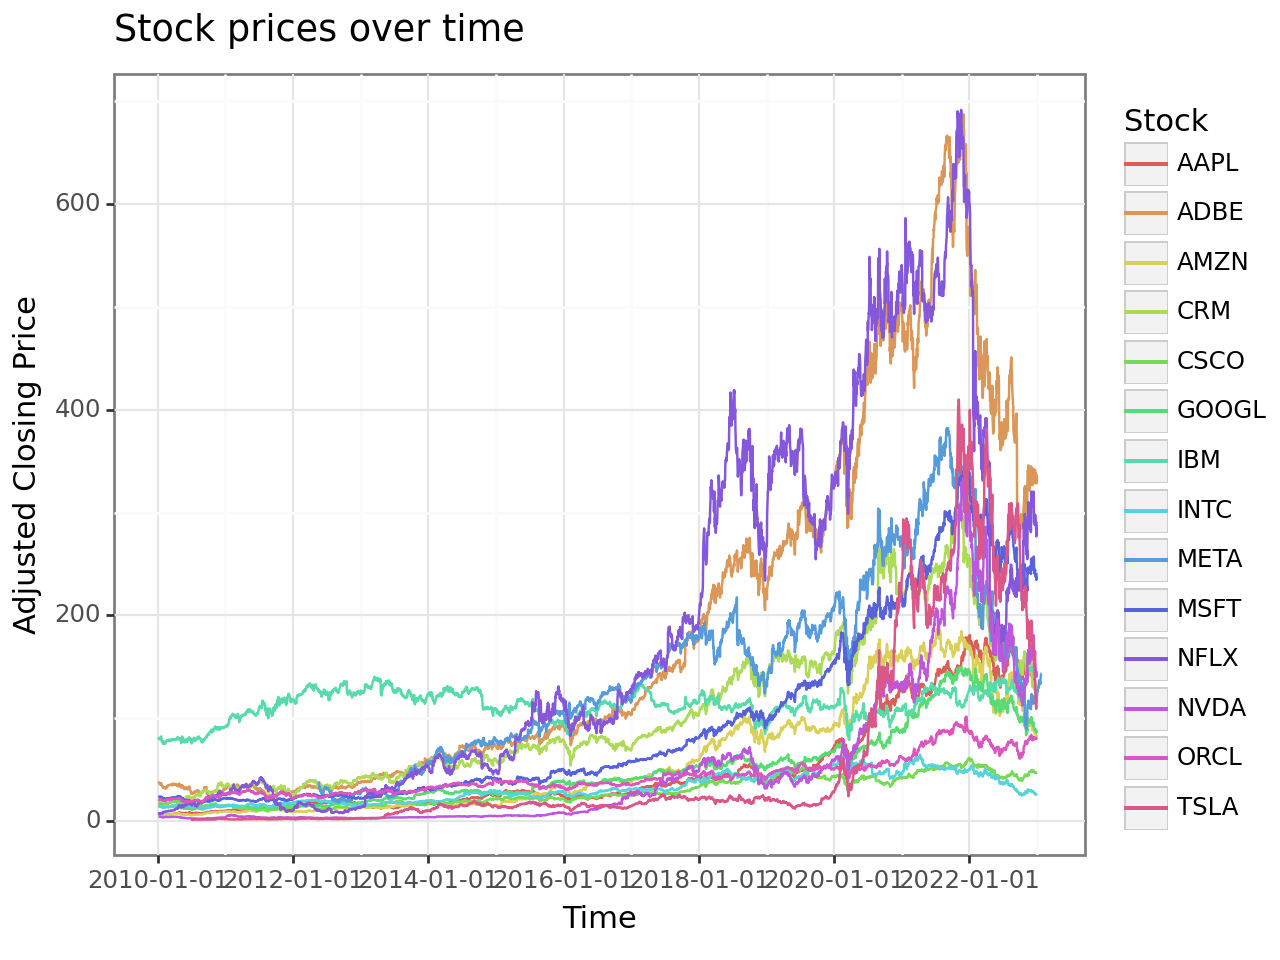

<Figure Size: (640 x 480)>

In [33]:
(
    ggplot(merged, aes(x = 'date', y = 'adj_close', color = 'stock_symbol', group = 'stock_symbol')) +
    geom_line() +
    theme_bw() +
    labs(x = 'Time', y = 'Adjusted Closing Price', color = 'Stock', title = 'Stock prices over time')
)

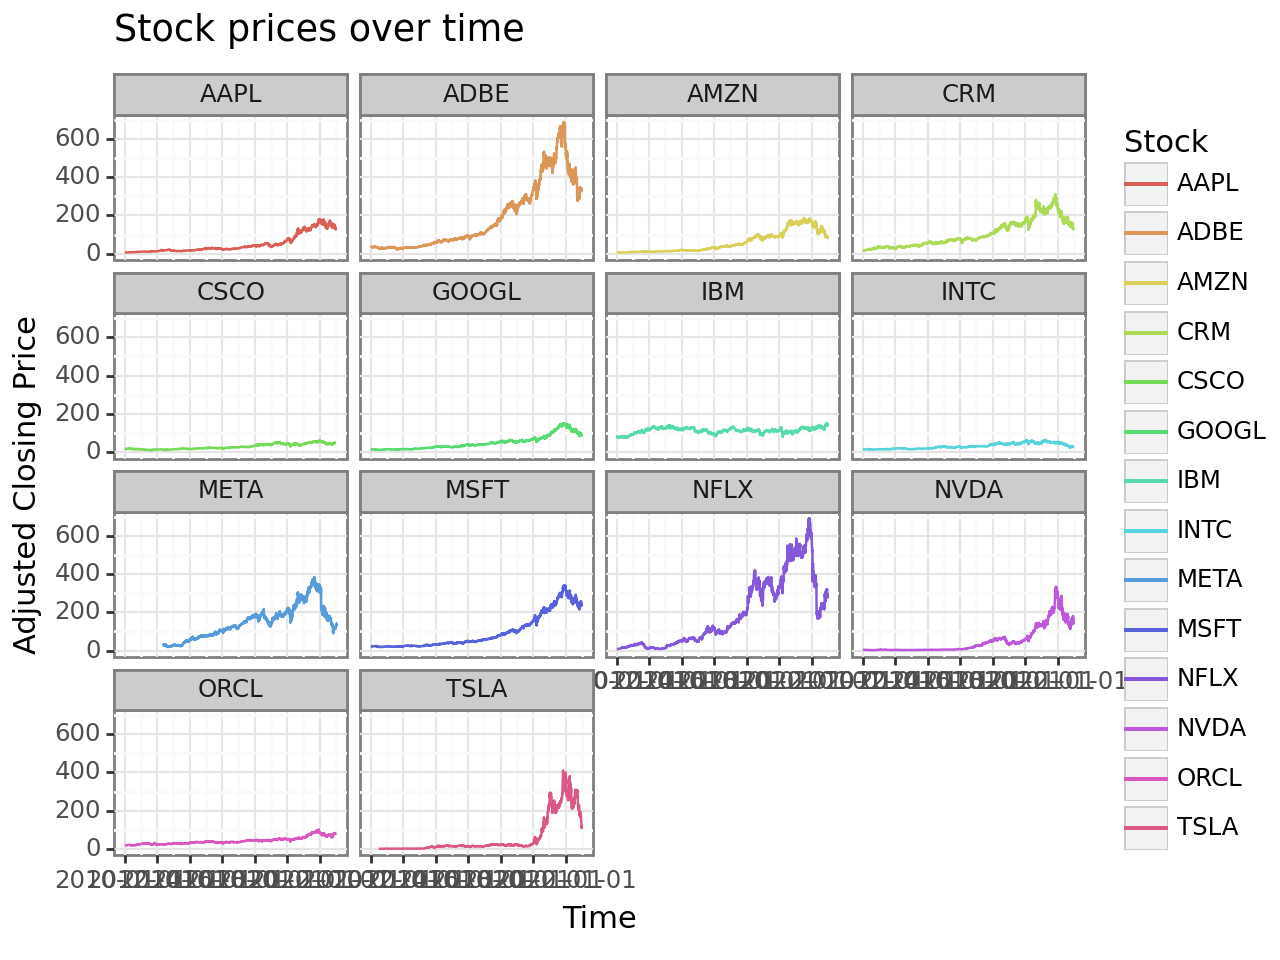

<Figure Size: (640 x 480)>

In [34]:
(
    ggplot(merged, aes(x = 'date', y = 'adj_close', color = 'stock_symbol', group = 'stock_symbol')) +
    geom_line() +
    theme_bw() +
    labs(x = 'Time', y = 'Adjusted Closing Price', color = 'Stock', title = 'Stock prices over time') +
    facet_wrap('~stock_symbol')
)

In [35]:
merged_wide = (
    merged.drop('company', axis = 1).pivot(
        index=["date"],
        columns="stock_symbol",
        values="adj_close",
    )
    .add_prefix("adj_close_")
    .reset_index()
)

print(merged_wide.head())
merged_wide.isnull().sum()

stock_symbol       date  adj_close_AAPL  adj_close_ADBE  adj_close_AMZN  \
0            2010-01-04           6.515          37.090           6.695   
1            2010-01-05           6.526          37.700           6.734   
2            2010-01-06           6.423          37.620           6.612   
3            2010-01-07           6.411          36.890           6.500   
4            2010-01-08           6.453          36.690           6.676   

stock_symbol  adj_close_CRM  adj_close_CSCO  adj_close_GOOGL  adj_close_IBM  \
0                    18.705          17.394           15.684         81.315   
1                    18.625          17.317           15.615         80.332   
2                    18.593          17.204           15.222         79.811   
3                    18.510          17.281           14.867         79.534   
4                    18.538          17.373           15.066         80.332   

stock_symbol  adj_close_INTC  adj_close_META  adj_close_MSFT  adj_close_NF

stock_symbol
date                0
adj_close_AAPL     16
adj_close_ADBE     16
adj_close_AMZN     16
adj_close_CRM      16
                 ... 
adj_close_MSFT     16
adj_close_NFLX     16
adj_close_NVDA     16
adj_close_ORCL     16
adj_close_TSLA    139
Length: 15, dtype: int64

stock_symbol
date                0
adj_close_AAPL     16
adj_close_ADBE     16
adj_close_AMZN     16
adj_close_CRM      16
                 ... 
adj_close_MSFT     16
adj_close_NFLX     16
adj_close_NVDA     16
adj_close_ORCL     16
adj_close_TSLA    139
Length: 15, dtype: int64


/home/janhsc/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/missingno/missingno.py:60: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.


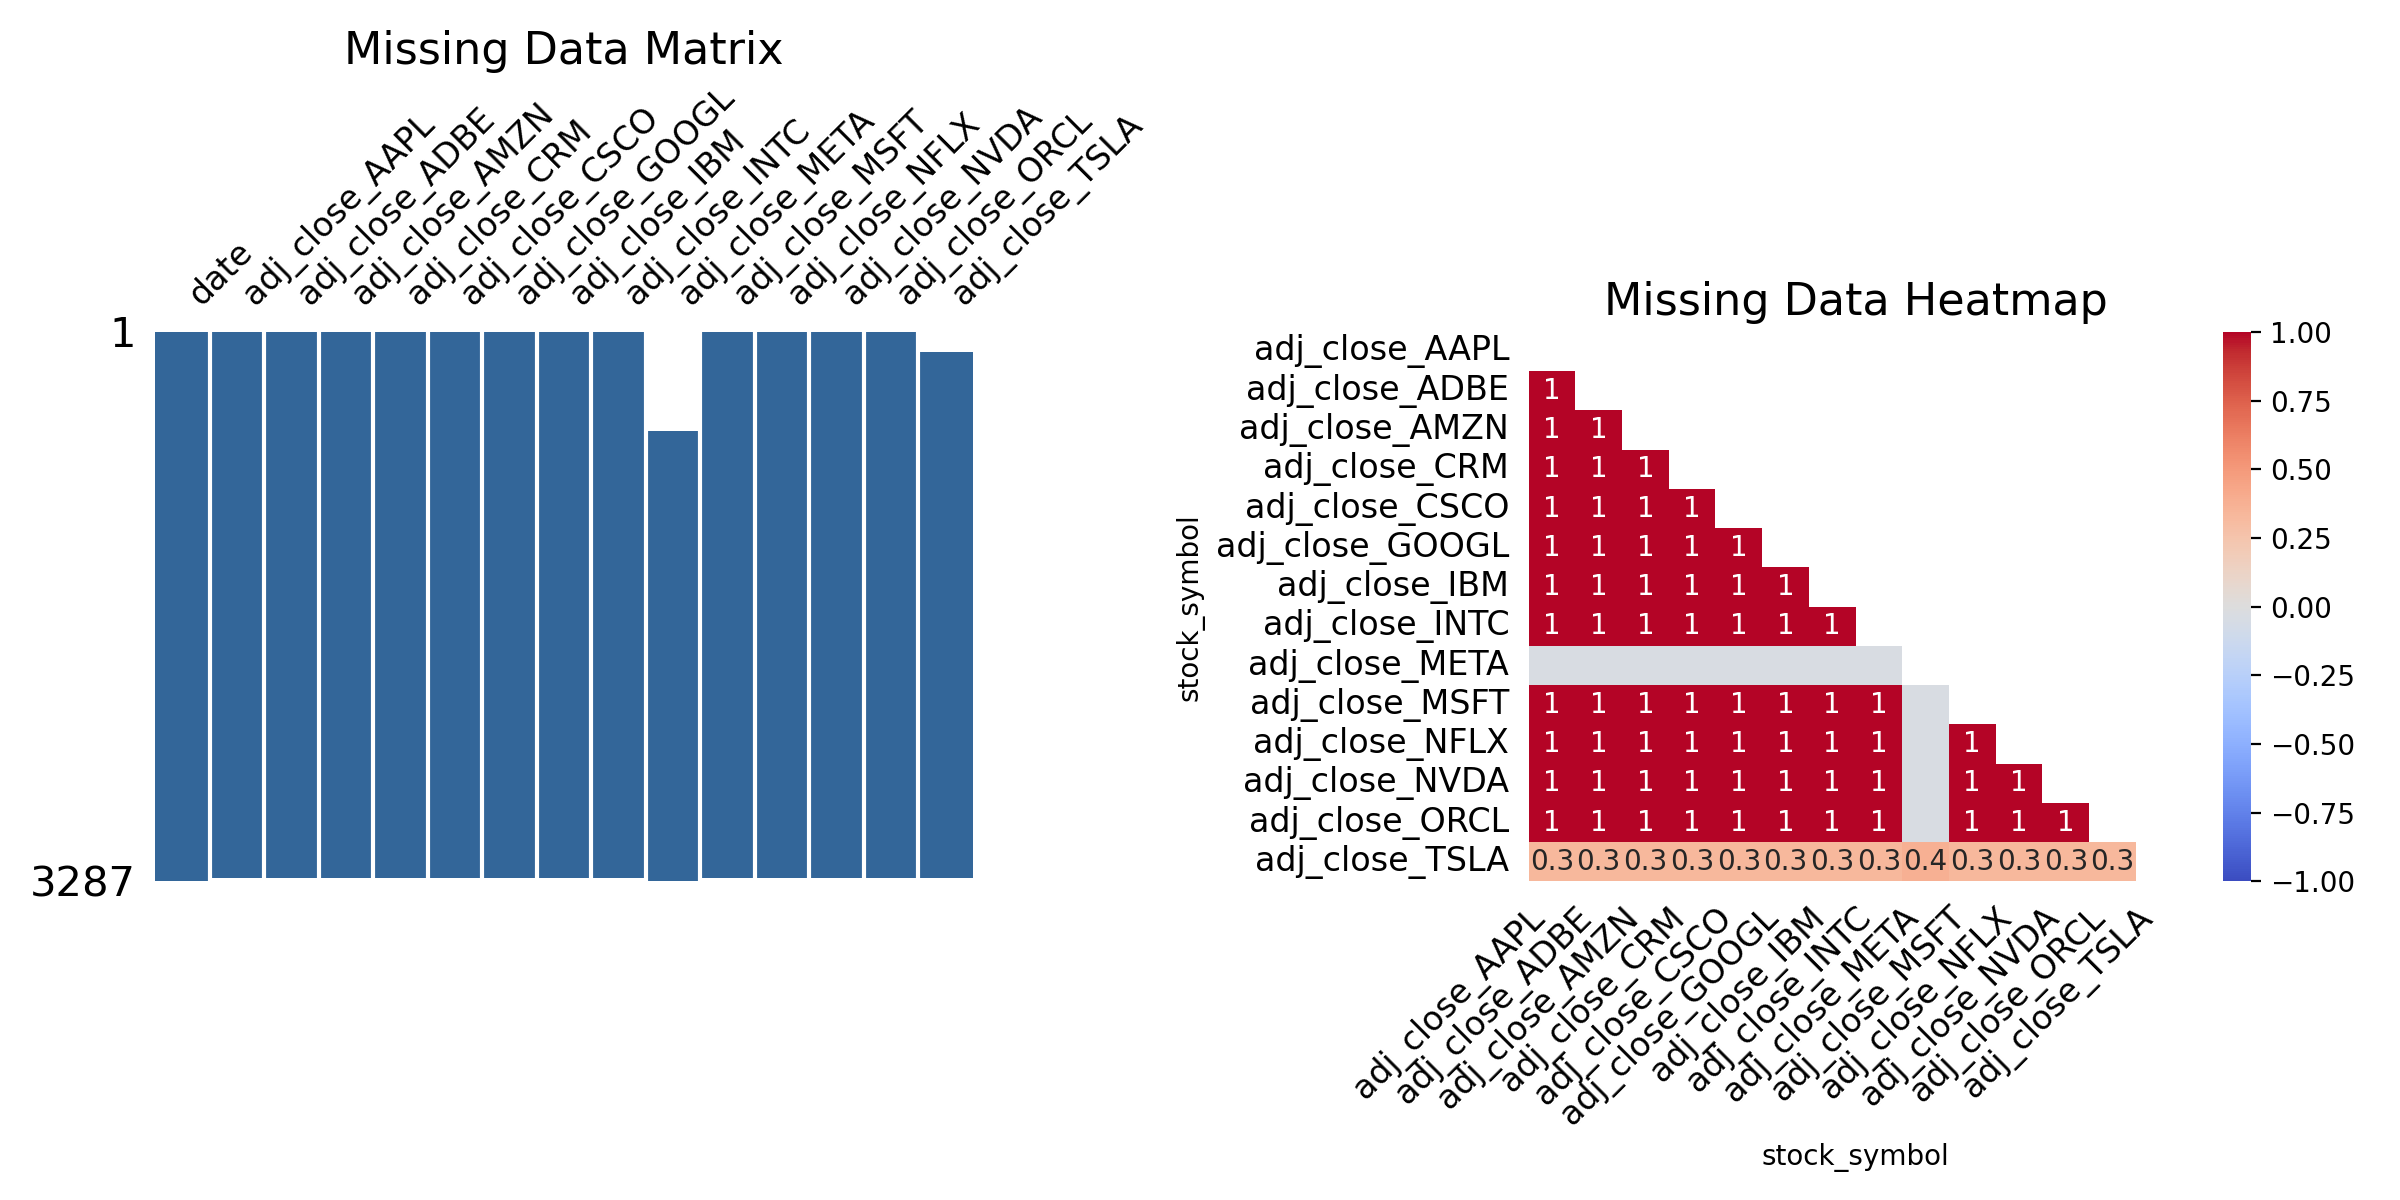

In [36]:
# Count number of missing values for each column
print(merged_wide.isnull().sum())

# Create a figure and axes for customizing the plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Customize the matrix plot
msno.matrix(merged_wide, ax=axes[0], sparkline=True, fontsize=12, color=(0.2, 0.4, 0.6))
axes[0].set_title('Missing Data Matrix', fontsize=16)

# Customize the heatmap plot
msno.heatmap(merged_wide, ax=axes[1], cmap='coolwarm', fontsize=12)
axes[1].set_title('Missing Data Heatmap', fontsize=16)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [37]:
merged_wide.isnull().sum().sort_values(ascending=False)

stock_symbol
adj_close_META    599
adj_close_TSLA    139
adj_close_AAPL     16
adj_close_ADBE     16
adj_close_AMZN     16
                 ... 
adj_close_MSFT     16
adj_close_NFLX     16
adj_close_NVDA     16
adj_close_ORCL     16
date                0
Length: 15, dtype: int64

Missing values in the data appear to be strongly correlated. Further inspections show that META and TESLA have by far the most amount of missing values since their IPO's were in 2012 (META) and late 2010 (TESLA). Thus, these stocks will have to be analyzed separately from the rest of the stocks.

In [38]:
mask = merged_wide.isnull().any(axis = 1)
rows_with_na = merged_wide[mask]
print(f'Number of rows with at least one NA:{rows_with_na.shape[0]}')
print(f'Total number of rows')

Number of rows with at least one NA:615
Total number of rows


In [39]:
meta = (
    merged_wide[['date', 'adj_close_META']]
        .query('not adj_close_META.isna()') 
)
tesla = (
    merged_wide[['date', 'adj_close_TSLA']]
        .query('not adj_close_TSLA.isna()')
)
print(meta.head())
print(f'META shape: {meta.shape}, Tesla shape: {tesla.shape}')

stock_symbol       date  adj_close_META
599          2012-05-18          38.230
600          2012-05-21          34.030
601          2012-05-22          31.000
602          2012-05-23          32.000
603          2012-05-24          33.030
META shape: (2688, 2), Tesla shape: (3148, 2)


In [40]:
merged_wide.columns.tolist()

['date',
 'adj_close_AAPL',
 'adj_close_ADBE',
 'adj_close_AMZN',
 'adj_close_CRM',
 'adj_close_CSCO',
 'adj_close_GOOGL',
 'adj_close_IBM',
 'adj_close_INTC',
 'adj_close_META',
 'adj_close_MSFT',
 'adj_close_NFLX',
 'adj_close_NVDA',
 'adj_close_ORCL',
 'adj_close_TSLA']

In [73]:
# create dataframe with logreturns of all stocks but tesla and meta
# if plrets are required just multiply df by 100
stocks_wide = merged_wide.drop(['adj_close_META', 'adj_close_TSLA'], axis = 1)
stocks_lrets = np.log(1 + stocks_wide.drop('date', axis = 1).pct_change())
stocks_lrets['date'] = stocks_wide['date']
stocks_lrets = stocks_lrets.dropna()
# print(stocks_lrets.head())

# create dataframes for meta and tesla with logreturns
meta_lrets = np.log(1 + meta.drop('date', axis = 1).pct_change())
meta_lrets['date'] = meta['date']
meta_lrets = meta_lrets.dropna()
print(meta_lrets.head())

tesla_lrets = np.log(1 + tesla.drop('date', axis = 1).pct_change())
tesla_lrets['date'] = tesla['date']
tesla_lrets = tesla_lrets.dropna()
print(tesla_lrets.head())

stock_symbol   lret       date
600          -0.116 2012-05-21
601          -0.093 2012-05-22
602           0.032 2012-05-23
603           0.032 2012-05-24
604          -0.034 2012-05-25
stock_symbol   lret       date
124          -0.082 2010-07-01
125          -0.134 2010-07-02
126          -0.175 2010-07-06
127          -0.019 2010-07-07
128           0.100 2010-07-08


In [76]:
# bring into correct format for plotting
tesla_lrets['stock'] = 'TSLA'
meta_lrets['stock'] = 'META'
tesla.rename(columns = {'adj_close_TSLA' : 'lret'}, inplace = True)
meta.rename(columns = {'adj_close_META' : 'lret'}, inplace = True)

In [78]:
tesla_lrets.head()

stock_symbol,lret,date,stock
124,-0.082,2010-07-01,TSLA
125,-0.134,2010-07-02,TSLA
126,-0.175,2010-07-06,TSLA
127,-0.019,2010-07-07,TSLA
128,0.100,2010-07-08,TSLA


In [44]:
meta_lrets.head()

stock_symbol,date,lret
599,2012-05-18,38.230
600,2012-05-21,34.030
601,2012-05-22,31.000
602,2012-05-23,32.000
603,2012-05-24,33.030


In [45]:
pd.concat([meta_lrets, tesla_lrets])

stock_symbol,date,lret
599,2012-05-18,38.230
600,2012-05-21,34.030
601,2012-05-22,31.000
602,2012-05-23,32.000
603,2012-05-24,33.030
...,...,...
3266,2022-12-22,125.350
3267,2022-12-23,123.150
3268,2022-12-27,109.100
3269,2022-12-28,112.710


In [47]:
np.sum(stocks_wide[1:].to_numpy()==stocks_wide[:-1].to_numpy())

209

In [48]:
np.sum(prices['volume'] == 0)

0

There are 401 rows for which the closing price is 0. Further, for 209 rows two days in a row have a closing price of 0. However, we can see that on no day the volume was 0 meaning that the adjusted closing prices really were the same. Thus, no rows have to be removed.

            date stock  lret
1196  2014-10-06  AAPL 0.000
1749  2016-12-14  AAPL 0.000
2007  2017-12-22  AAPL 0.000
2641  2020-07-02  AAPL 0.000
3140  2022-06-27  AAPL 0.000
...          ...   ...   ...
39427 2023-01-18  ORCL 0.000
39428 2023-01-19  ORCL 0.000
39429 2023-01-20  ORCL 0.000
39430 2023-01-23  ORCL 0.000
39431 2023-01-24  ORCL 0.000

[401 rows x 3 columns]


/home/janhsc/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 186'. Pick better value with 'binwidth'.
/home/janhsc/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 223 rows containing non-finite values.
/home/janhsc/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_density : Removed 223 rows containing non-finite values.
/home/janhsc/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 14 rows containing missing values.


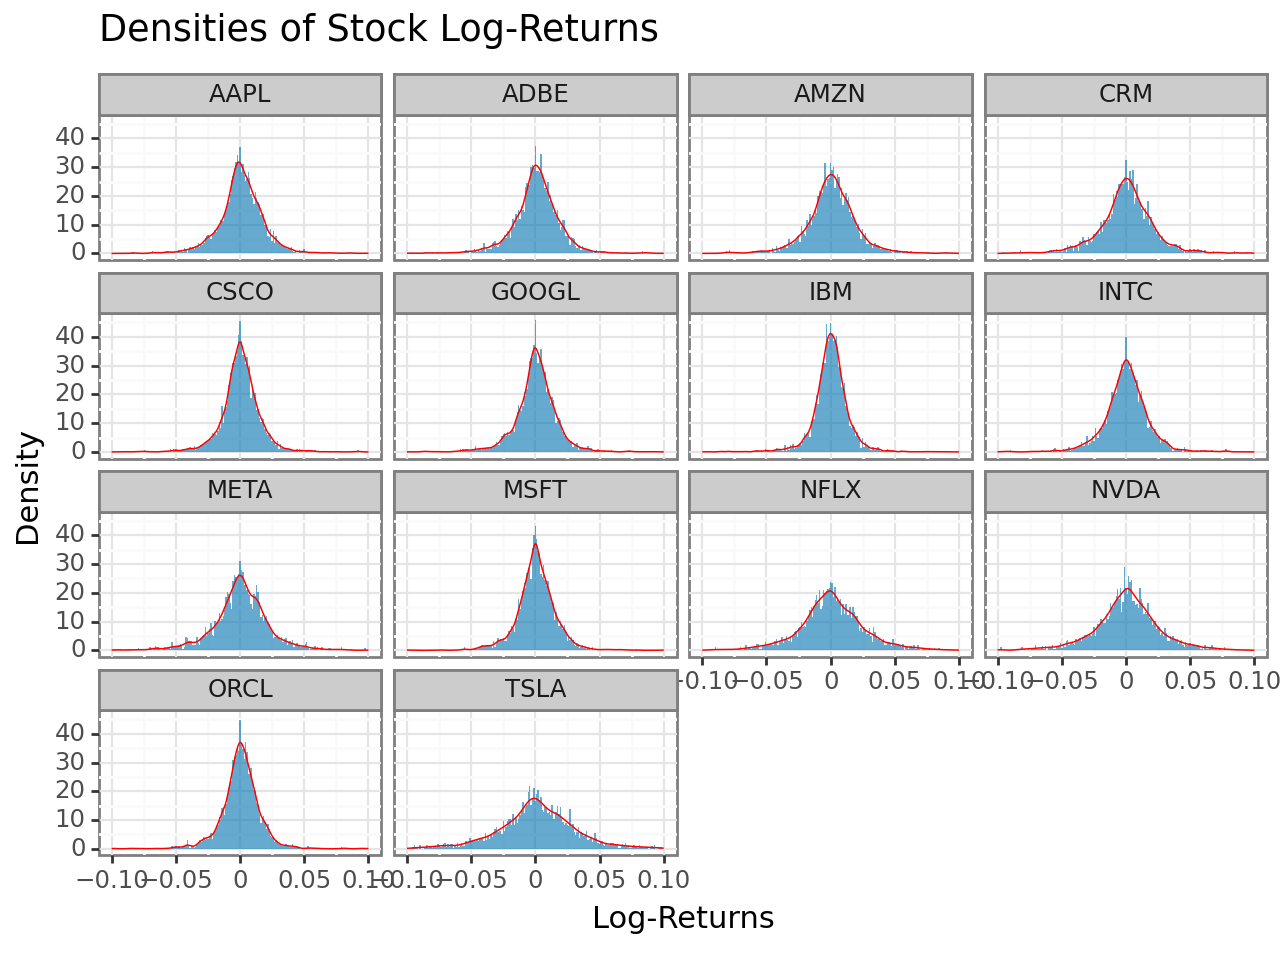

<Figure Size: (640 x 480)>

In [81]:
# create dataframe for plotting:
stocks_lrets_long = stocks_lrets.melt(
    id_vars="date", var_name="stock", value_name="lret"
)
# rename variables
stocks_lrets_long['stock'] = stocks_lrets_long["stock"].str.replace("^.*_.*_", "", regex=True)

print(stocks_lrets_long.query('lret == 0'))

all_stocks_lrets_long = (
    pd.concat(
        [stocks_lrets_long, meta_lrets, tesla_lrets],
        axis = 0
    )
)


# plot logreturns distribution
(
    ggplot(all_stocks_lrets_long, aes(x = 'lret')) +
    geom_histogram(aes(y = 'stat(density)'), fill='#0072B2', alpha=0.6, position='identity') +  # Histogram
    geom_density(color='red', size= 0.3) +  # KDE overlay
    scale_x_continuous(limits = (-0.1, 0.1)) +
    facet_wrap('~stock') + 
    theme_bw() +
    labs(x = 'Log-Returns', y = 'Density', title = 'Densities of Stock Log-Returns')
)

It is obvious, that the distributions are highly non-normal due to the fat tails. This is a common feature of financial data.

['2010', '2012', '2014', '2016', '2018', '2020', '2023'] DatetimeIndex(['2010-01-05 00:00:00', '2012-03-09 12:00:00',
               '2014-05-13 00:00:00', '2016-07-15 12:00:00',
               '2018-09-18 00:00:00', '2020-11-20 12:00:00',
               '2023-01-24 00:00:00'],
              dtype='datetime64[ns]', freq=None)


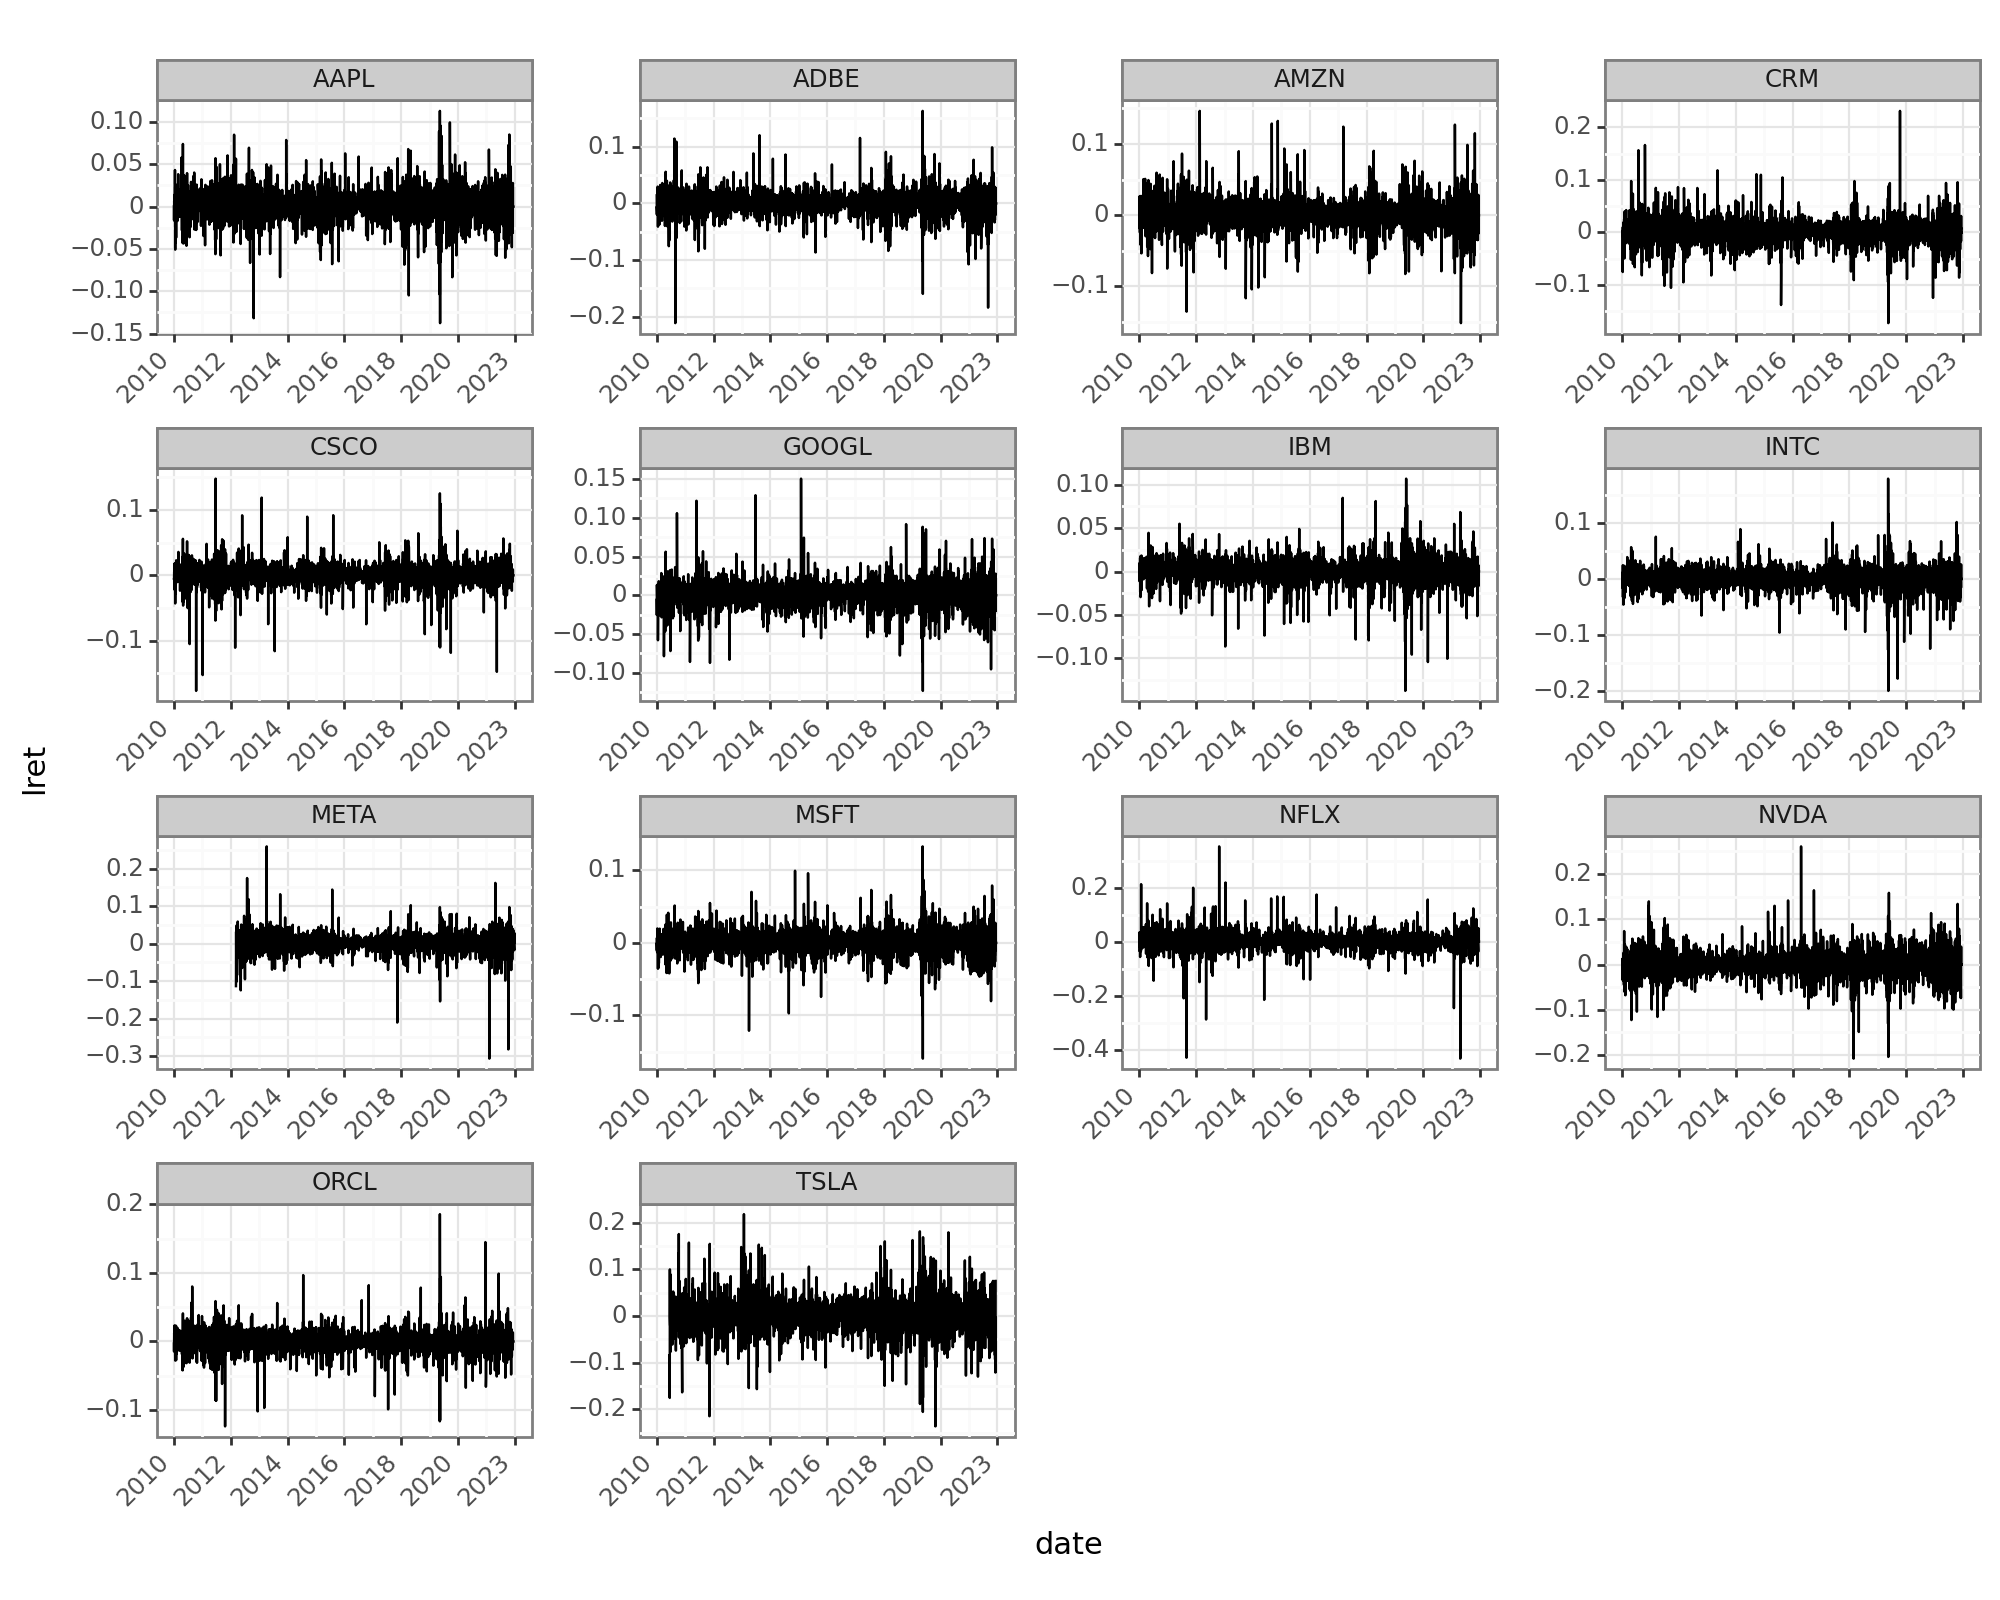

<Figure Size: (1000 x 800)>

In [135]:
date_range = pd.date_range(
    pd.to_datetime(all_stocks_lrets_long["date"]).min(),
    pd.to_datetime(all_stocks_lrets_long["date"]).max(),
    periods=6 + 1,
)
limits = [
    pd.to_datetime(all_stocks_lrets_long["date"]).min(),
    pd.to_datetime(all_stocks_lrets_long["date"]).max(),
]
dates = [str(date.strftime("%Y")) for date in date_range]
print(dates, date_range)

(
    ggplot(all_stocks_lrets_long, aes(x="date", y="lret"))
    + geom_line()
    + scale_x_date(labels=dates, limits=limits, breaks=date_range)
    + facet_wrap("~stock", scales="free")
    + theme_bw()
    + theme(figure_size=(10, 8), 
            axis_text_x = element_text(angle = 45, hjust = 1))
)

We can see clear evidence for volatility clustering

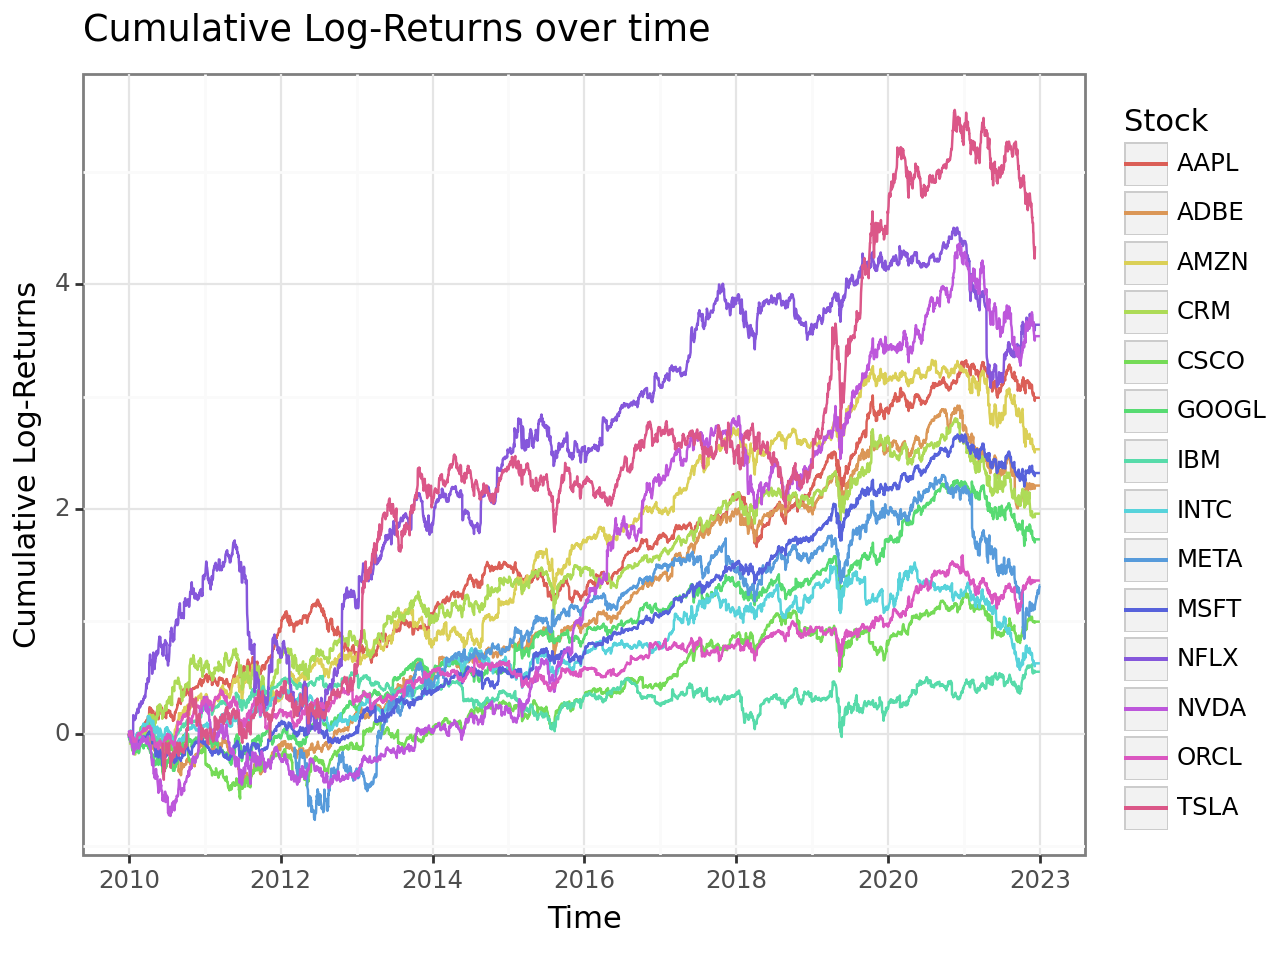

<Figure Size: (640 x 480)>

In [142]:
# calculate cumulative returns
all_stocks_lrets_long["cumlret"] = all_stocks_lrets_long.groupby("stock")[
    "lret"
].cumsum()

date_range = pd.date_range(
    pd.to_datetime(all_stocks_lrets_long["date"]).min(),
    pd.to_datetime(all_stocks_lrets_long["date"]).max(),
    periods=6 + 1,
)
limits = [
    pd.to_datetime(all_stocks_lrets_long["date"]).min(),
    pd.to_datetime(all_stocks_lrets_long["date"]).max(),
]
dates = [str(date.strftime("%Y")) for date in date_range]

# plot cumulative returns
(
    ggplot(all_stocks_lrets_long, aes(x="date", y="cumlret", group = 'stock', color = 'stock')) +
    geom_line() +
    theme_bw() +
    scale_x_date(labels=dates, limits=limits, breaks=date_range) +
    labs(x = 'Time', y = 'Cumulative Log-Returns', color = 'Stock', title = 'Cumulative Log-Returns over time')
)

Overall TSLA hs the highest

In [162]:

max_date = all_stocks_lrets_long["date"].max()
print(all_stocks_lrets_long.query("date == @max_date").sort_values(
    by="cumlret", ascending=False
)[["stock", "cumlret"]])

all_stocks_lrets_long.query('stock == "TSLA"').iloc[-1, :]

      stock  cumlret
32859  NFLX    3.640
36145  NVDA    3.539
3285   AAPL    2.990
9857   AMZN    2.532
29573  MSFT    2.320
...     ...      ...
39431  ORCL    1.363
3286   META    1.320
16429  CSCO    0.997
26287  INTC    0.626
23001   IBM    0.551

[13 rows x 2 columns]


date       2022-12-29 00:00:00
stock                     TSLA
lret                     0.078
cumlret                  4.340
Name: 3270, dtype: object

We can see that TSLA had the highest cumulative log-return but does not have data for the whole period. It is unclear how the stock would have behaved in the future but it appears as though it was on a massive downwards spiral. Amongst the stocks that have data for the whole period, we can see that NFLX has the highest cumulative log-return. 

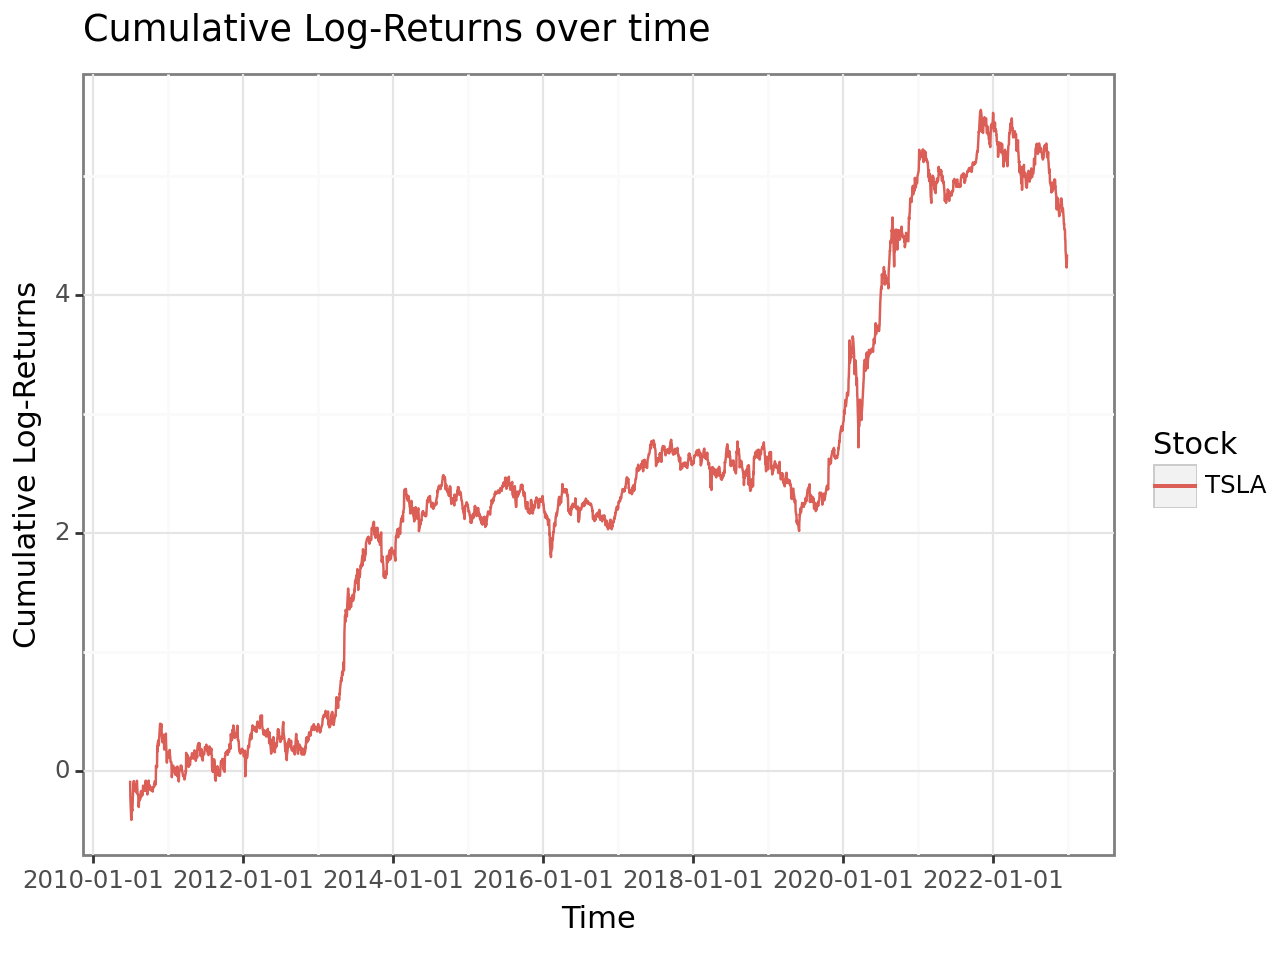

<Figure Size: (640 x 480)>

In [165]:
(
    ggplot(all_stocks_lrets_long.query('stock == "TSLA"'), aes(x="date", y="cumlret", group = 'stock', color = 'stock')) +
    geom_line() +
    theme_bw() +
    labs(x = 'Time', y = 'Cumulative Log-Returns', color = 'Stock', title = 'Cumulative Log-Returns over time')
)

In [187]:
all_stocks_lrets_long['5d_roll_sd'] = all_stocks_lrets_long.groupby('stock')['lret'].rolling(window = 5).std().reset_index()['lret']
all_stocks_lrets_long['30d_roll_sd'] = all_stocks_lrets_long.groupby('stock')['lret'].rolling(window = 30).std().reset_index()['lret']
all_stocks_lrets_long['252d_roll_sd'] = all_stocks_lrets_long.groupby('stock')['lret'].rolling(window = 252).std().reset_index()['lret']


all_stocks_lrets_long.head()

,date,stock,lret,cumlret,5d_roll_sd,30d_roll_sd,252d_roll_sd
0,2010-01-05,AAPL,0.002,0.002,NaN,NaN,NaN
1,2010-01-06,AAPL,-0.016,-0.014,NaN,NaN,NaN
2,2010-01-07,AAPL,-0.002,-0.016,NaN,NaN,NaN
3,2010-01-08,AAPL,0.007,-0.010,NaN,NaN,NaN
4,2010-01-11,AAPL,-0.009,-0.018,0.009,NaN,NaN


In [188]:
all_stocks_lrets_long.notnull().sum()

date            45266
stock           45266
lret            45266
cumlret         45266
5d_roll_sd      45213
30d_roll_sd     44888
252d_roll_sd    41875
dtype: int64

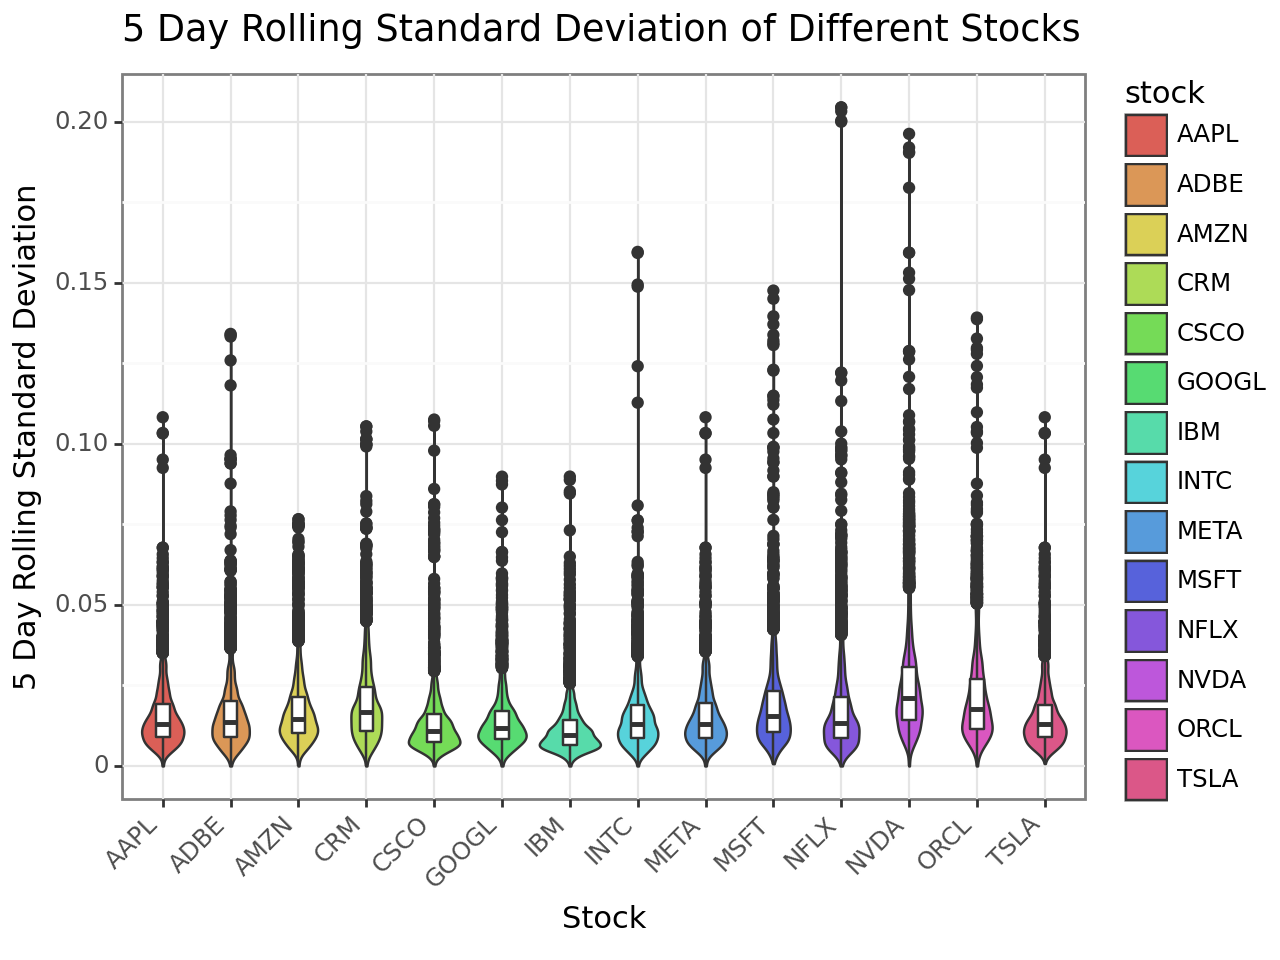

<Figure Size: (640 x 480)>

In [191]:
# plot 5 day rolling volatilities
(
    ggplot(
        all_stocks_lrets_long.dropna(subset=["5d_roll_sd"]),
        aes(x="stock", y="5d_roll_sd"),
    )
    + geom_violin(aes(fill="stock"))
    + geom_boxplot(width=0.2, fill="white")
    + theme_bw()
    + labs(
        x="Stock",
        fill="stock",
        y="5 Day Rolling Standard Deviation",
        title="5 Day Rolling Standard Deviation of Different Stocks",
    ) +
    theme(
        axis_text_x=element_text(angle=45, hjust=1)
    )
)

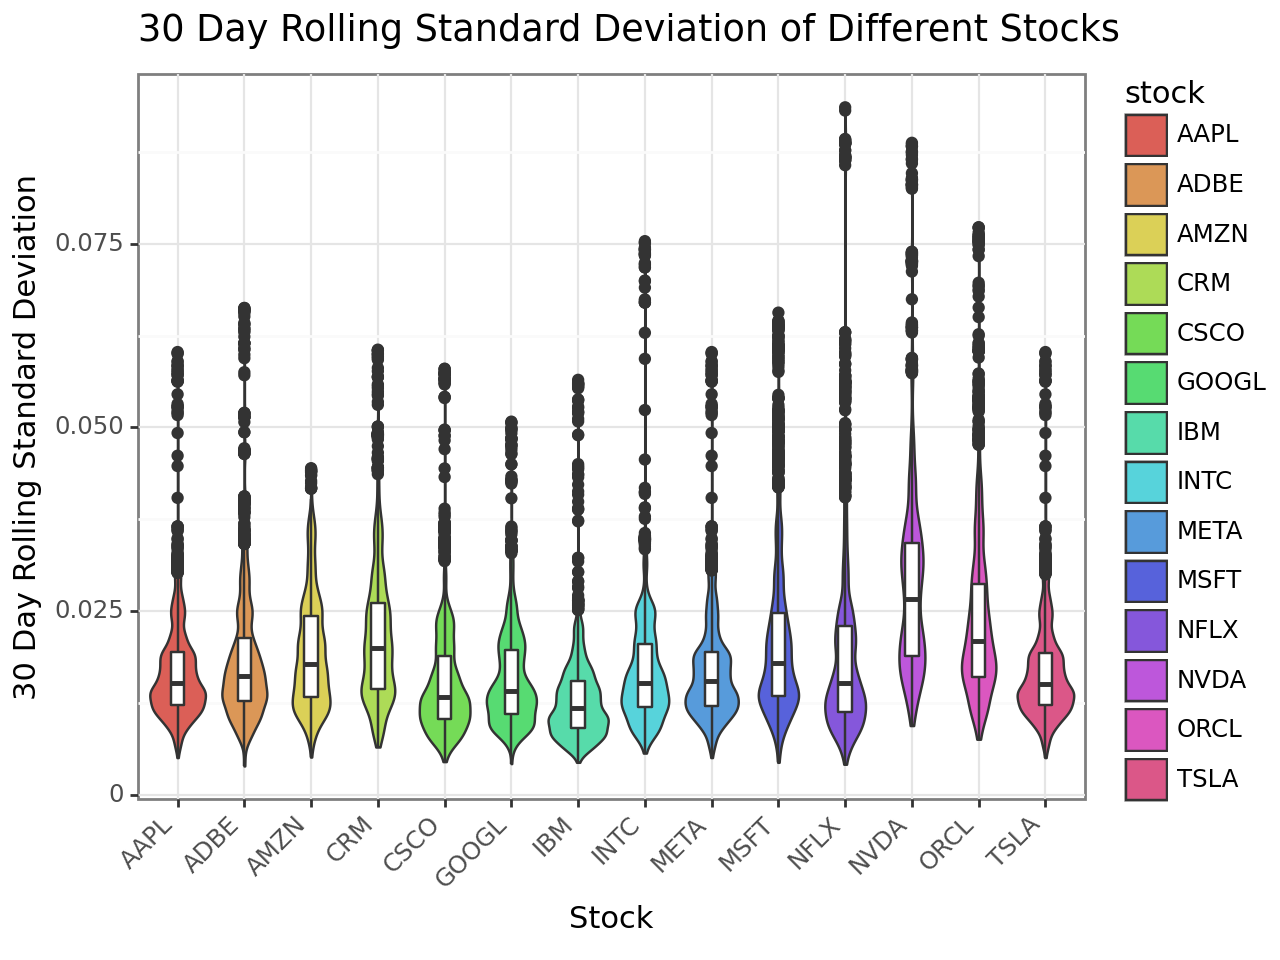

<Figure Size: (640 x 480)>

In [192]:
# plot 30 day rolling volatilities
(
    ggplot(
        all_stocks_lrets_long.dropna(subset=["30d_roll_sd"]),
        aes(x="stock", y="30d_roll_sd"),
    )
    + geom_violin(aes(fill="stock"))
    + geom_boxplot(width=0.2, fill="white")
    + theme_bw()
    + labs(
        x="Stock",
        fill="stock",
        y="30 Day Rolling Standard Deviation",
        title="30 Day Rolling Standard Deviation of Different Stocks",
    ) +
    theme(
        axis_text_x=element_text(angle=45, hjust=1)
    )
)

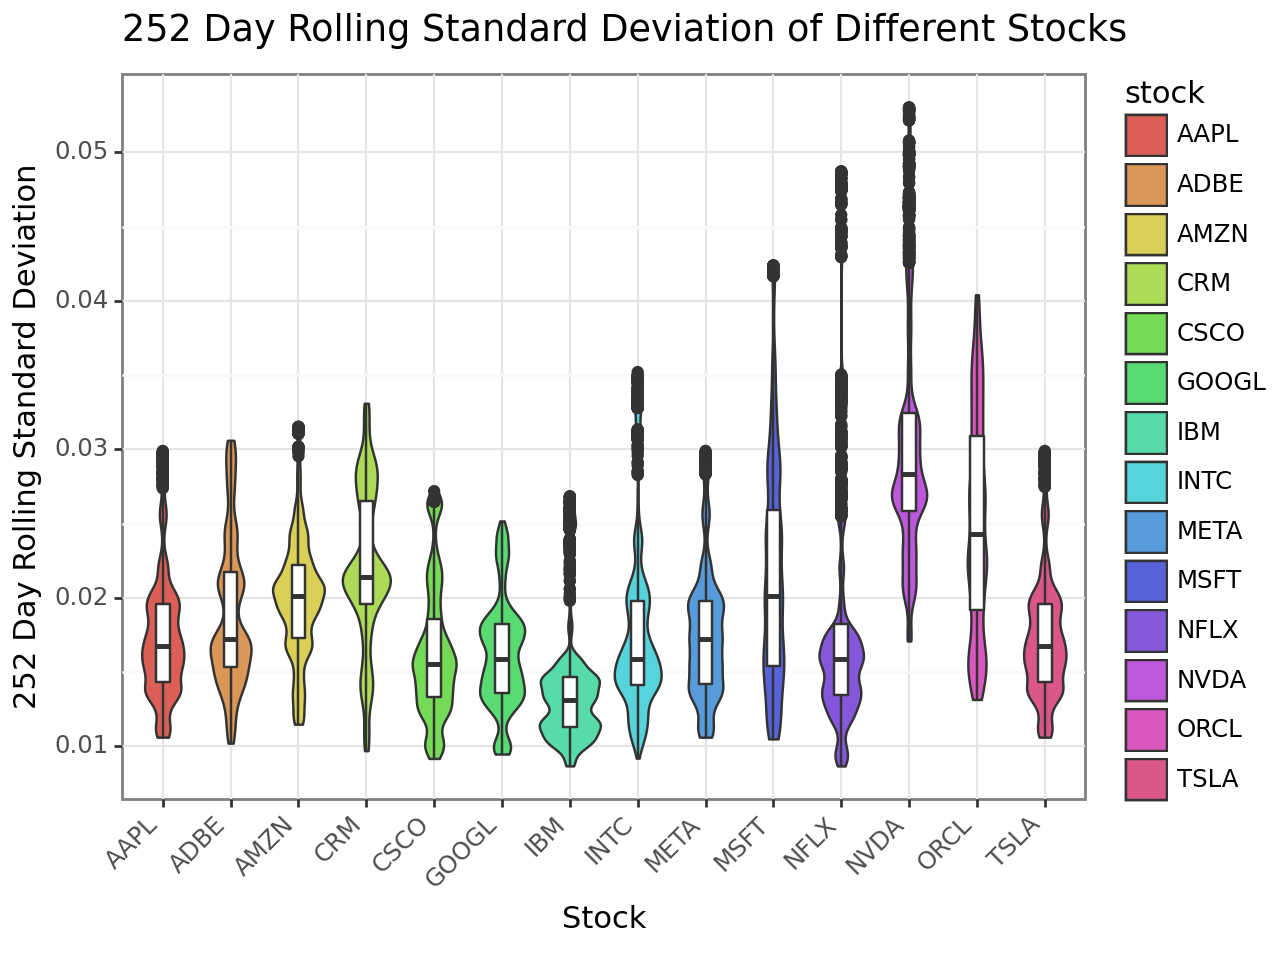

<Figure Size: (640 x 480)>

In [193]:
# plot 252 day rolling volatilities
(
    ggplot(
        all_stocks_lrets_long.dropna(subset=["252d_roll_sd"]),
        aes(x="stock", y="252d_roll_sd"),
    )
    + geom_violin(aes(fill="stock"))
    + geom_boxplot(width=0.2, fill="white")
    + theme_bw()
    + labs(
        x="Stock",
        fill="stock",
        y="252 Day Rolling Standard Deviation",
        title="252 Day Rolling Standard Deviation of Different Stocks",
    ) +
    theme(
        axis_text_x=element_text(angle=45, hjust=1)
    )
)

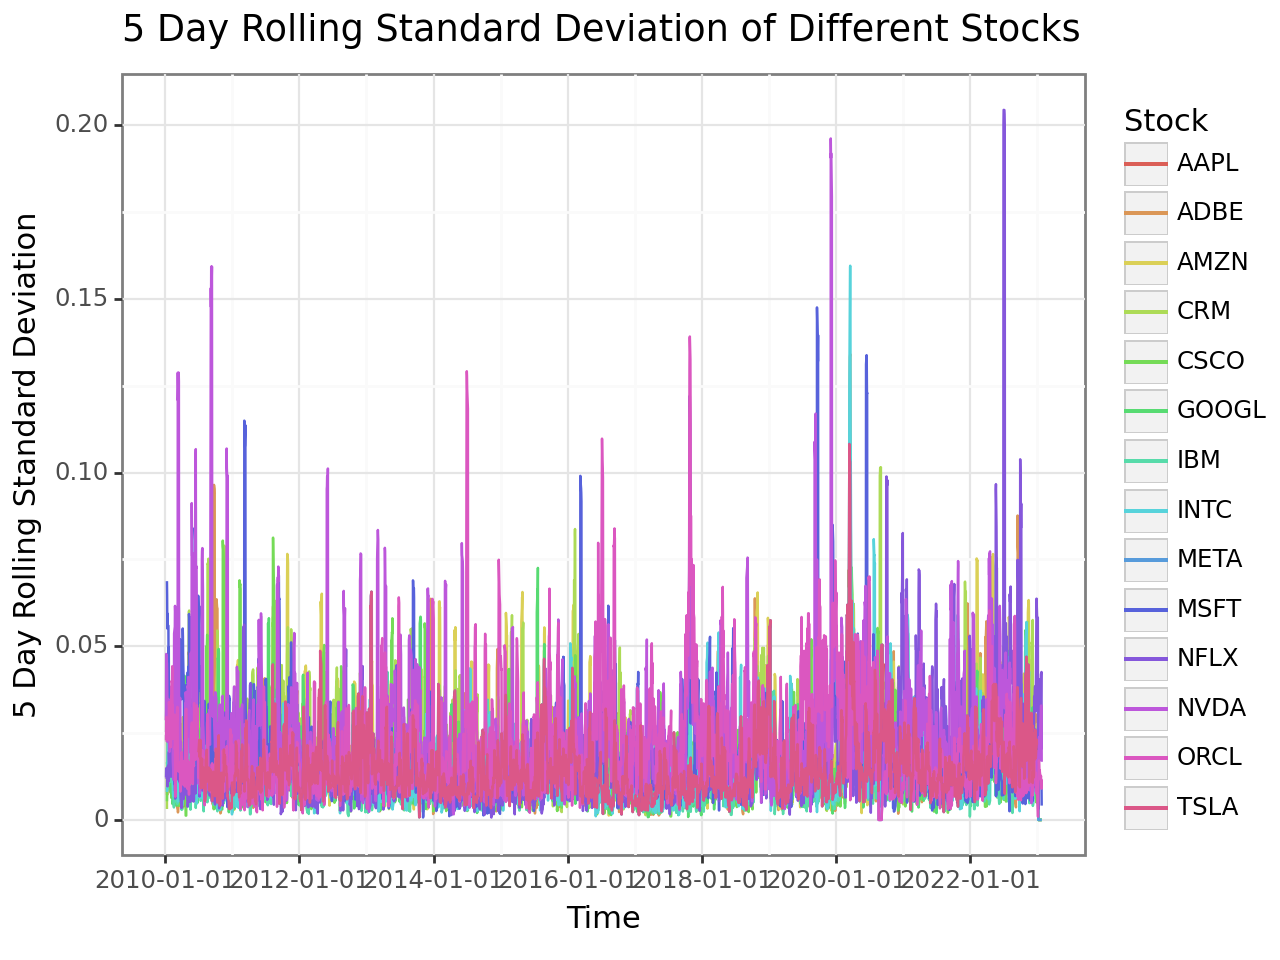

<Figure Size: (640 x 480)>

In [194]:
# plot 5 day rolling volatilities as line plot
(
    ggplot(
        all_stocks_lrets_long.dropna(subset=["5d_roll_sd"]),
        aes(x="date", y="5d_roll_sd", group = 'stock', color = 'stock'),
    )
    + geom_line() +
    theme_bw() +
    labs(
        x="Time",
        y="5 Day Rolling Standard Deviation",
        color = 'Stock',
        title="5 Day Rolling Standard Deviation of Different Stocks",
    )
)